# Why/Motivation: 

1. I was really intrigued by the recent development of Anthropic's chatbot, Claude, a supposedly more ethical chatbot compared to openAI's, chatGPT. I really wanted to test its capabilities of being more "ethical" to see if it was measuring up to its value proposition.

2. I wanted to do sentiment analysis of responses across the world wide web to see which one is most trusted.

3. Good for me to get updated on NLP techniques.

4. Fun to see how the world thinks of chatGPT/Claude and what they think of themselves. (turning Q & A on themselves. self-introspection)

5. Wanted to see if can do sentiment analysis across multiple emotions to not have such a Black and White assessment of statements since feelings/people's positions are usually not polar, but spead across a variety of feelings.

6. Not just explore Twitter (X) and Reddit, but also pop songs for real-time relevant responses.

7. Look at fresh time series data.

8. Explore a different viz py lib: d3.js to build more sophisticated, interactive viz for web portfolio

# Business Recommendation:

Thought this would be a nice twist on sentiment analysis on product launches. This is something I was looking to do since coming from product analytics, experimentation looked at event signals versus what people were actually saying about the product. People say that actions are louder than words, but words also speak volumes. Would have been nice to have complemented by experimentation resuslts with some sort of sentiment analysis. Would have added more weight, been more comprehensive assessment of new feature launches.

# 1. Define metrics of success (its value prop, for business) for helpful chatbot (use cases)

# 2. Scrape:
* ~Twitter~ have to pay for scrape; no bueno
* Reddit (1000 cap)
* Threads
* BlueSky
* Mastodon (spam, search sucks)?
* Substack/Substack Notes
* Medium
* YouTube
* LinkedIn
* Song Lyrics

to get info on following chatbots to do analysis on:
* chatGPT (OpenAI)
* Claude (Anthropic)
* Bard (Google)
* Bing Chat (Microsoft, images, voice chat)
* Perplexity AI (advancing how people discover and share information)
* Pi (empathetic/human emotions)

# chatGPT Comments

# 3. Complete d3.js visualizations on emotions

# 4. Other NLP-related analyses (Topic Modeling)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import json

In [2]:
# credentials = {}
# try:
#     with open('/kaggle/input/credentials/credentials.json') as file:
#         credentials = json.load(file)    
# except FileNotFoundError:
#     print("Error: credentials.json file not found.")
    
# print(credentials["youtube_api_key"])

In [3]:
credentials = json.load(open('/kaggle/input/credentials/credentials.json'))

# Next iteration, get >100 comments

In [4]:
# Ref: https://github.com/analyticswithadam/Python/blob/main/YouTubeComments.ipynb

import googleapiclient.discovery
import googleapiclient.errors

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = credentials["youtube_api_key"]

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="HrCIWSUXRmo",
    maxResults=1000
)
response = request.execute()

comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# df.head(10)

In [5]:
# Peak
df.head(10)

,author,published_at,updated_at,like_count,text
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests.."
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own."
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen
5,Chad Valentine,2023-10-08T17:30:02Z,2023-10-08T17:30:02Z,0,Your question is terrible. Its poorly formed. No wonder it couldnt answer. &quot;Do not deny that you know nothing&quot; Dont you mean &quot;Dont deny that you know of&quot;
6,Lystic,2023-10-07T05:56:18Z,2023-10-07T06:05:08Z,0,"A = B and B = A aren&#39;t necessarily the same relationship.<br>I teach an AI that 2+2 = 4. Then I show it 4 donuts. One donut spare and 3 in a bag. That&#39;s not 2+2 donuts, it&#39;s 1+3 donuts. For humans this is not easy to intuit as it&#39;s naturally understood.There are many combinations that make 4 donuts. And 4 donuts can mean many combinations. It&#39;s not the same relationship in practice. So maybe that&#39;s why it doesn&#39;t simply equate the two both ways. If 2+2 means 4, it shouldn&#39;t assume that 4 means 2+2.<br><br>A bicycle is a form of transportation. It doesn&#39;t equal a form of transportation. (A bicycle is many more things than a mode of transportation.) But it is. And a form of transportation doesn&#39;t equal and isn&#39;t necessarily a bicycle. The world is full of this."
7,DankMemer420,2023-10-06T23:36:11Z,2023-10-06T23:36:11Z,0,You just click baited my ass 😂
8,Con K,2023-10-06T22:54:44Z,2023-10-06T22:54:44Z,1,I wonder if we cant teach it to code basic logic for itself with code interpreter? Its pretty insane what it can help program.
9,wishsnfishs,2023-10-06T18:03:01Z,2023-10-06T18:03:01Z,1,I dont understand why LLMs cant review their own responses before submitting them - considering prompting them to do so usually improves the quality. Humans ourselves already overhear and evaluate our own speech as we produce it - imagine how garbled our communication would be if we weren&#39;t aware of what we&#39;d said until we stopped talking


# Add sentiment
## Candidates:
* Vader
* Happy Transformer
* TextBlob
* Google NL API

In [6]:
# Vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_vader = df.copy()
analyzer = SentimentIntensityAnalyzer()
df_vader['rating'] = df_vader['text'].apply(analyzer.polarity_scores)

# Docs on how scoring was derived and what it means: https://github.com/cjhutto/vaderSentiment#about-the-scoring
df_vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_vader['text']]
df_vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_vader['text']]
df_vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_vader['text']]
df_vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_vader['text']]

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df_vader.head(10)

,author,published_at,updated_at,like_count,text,rating,compound,neg,neu,pos
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests..","{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}",0.4588,0.000,0.700,0.300
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own.","{'neg': 0.138, 'neu': 0.722, 'pos': 0.14, 'compound': 0.0348}",0.0348,0.138,0.722,0.140
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.6969}",0.6969,0.000,0.693,0.307
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,1.000,0.000
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,1.000,0.000
5,Chad Valentine,2023-10-08T17:30:02Z,2023-10-08T17:30:02Z,0,Your question is terrible. Its poorly formed. No wonder it couldnt answer. &quot;Do not deny that you know nothing&quot; Dont you mean &quot;Dont deny that you know of&quot;,"{'neg': 0.159, 'neu': 0.719, 'pos': 0.122, 'compound': -0.3022}",-0.3022,0.159,0.719,0.122
6,Lystic,2023-10-07T05:56:18Z,2023-10-07T06:05:08Z,0,"A = B and B = A aren&#39;t necessarily the same relationship.<br>I teach an AI that 2+2 = 4. Then I show it 4 donuts. One donut spare and 3 in a bag. That&#39;s not 2+2 donuts, it&#39;s 1+3 donuts. For humans this is not easy to intuit as it&#39;s naturally understood.There are many combinations that make 4 donuts. And 4 donuts can mean many combinations. It&#39;s not the same relationship in practice. So maybe that&#39;s why it doesn&#39;t simply equate the two both ways. If 2+2 means 4, it shouldn&#39;t assume that 4 means 2+2.<br><br>A bicycle is a form of transportation. It doesn&#39;t equal a form of transportation. (A bicycle is many more things than a mode of transportation.) But it is. And a form of transportation doesn&#39;t equal and isn&#39;t necessarily a bicycle. The world is full of this.","{'neg': 0.019, 'neu': 0.981, 'pos': 0.0, 'compound': -0.3412}",-0.3412,0.019,0.981,0.000
7,DankMemer420,2023-10-06T23:36:11Z,2023-10-06T23:36:11Z,0,You just click baited my ass 😂,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.5423}",-0.5423,0.412,0.588,0.000
8,Con K,2023-10-06T22:54:44Z,2023-10-06T22:54:44Z,1,I wonder if we cant teach it to code basic logic for itself with code interpreter? Its pretty insane what it can help program.,"{'neg': 0.094, 'neu': 0.699, 'pos': 0.206, 'compound': 0.4939}",0.4939,0.094,0.699,0.206
9,wishsnfishs,2023-10-06T18:03:01Z,2023-10-06T18:03:01Z,1,I dont understand why LLMs cant review their own responses before submitting them - considering prompting them to do so usually improves the quality. Humans ourselves already overhear and evaluate our own speech as we produce it - imagine how garbled our communication would be if we weren&#39;t aware of what we&#39;d said until we stopped talking,"{'neg': 0.033, 'neu': 0.913, 'pos': 0.054, 'compound': 0.2911}",0.2911,0.033,0.913,0.054


In [8]:
# Happy Transformer
df_ht = df.copy()

In [9]:
!pip install -q transformers
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [10]:
# Had to truncate test df since library has limit on input of words/vocabulary/tokens
test = df_ht.head(5)

In [11]:
test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))
test.head()

/tmp/ipykernel_21/172617282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))


,author,published_at,updated_at,like_count,text,result
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests..","[{'label': 'NEU', 'score': 0.9204737544059753}]"
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own.","[{'label': 'NEG', 'score': 0.9524347186088562}]"
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!,"[{'label': 'POS', 'score': 0.979310154914856}]"
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?,"[{'label': 'NEU', 'score': 0.866348147392273}]"
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen,"[{'label': 'NEU', 'score': 0.963374137878418}]"


In [12]:
test = (
test.assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_analysis(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

test.head()

,author,published_at,updated_at,like_count,text,result,sentiment,label,score
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests..","[{'label': 'NEU', 'score': 0.9204737544059753}]","[{'label': 'NEU', 'score': 0.9204737544059753}]",NEU,0.920474
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own.","[{'label': 'NEG', 'score': 0.9524347186088562}]","[{'label': 'NEG', 'score': 0.9524347186088562}]",NEG,0.952435
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!,"[{'label': 'POS', 'score': 0.979310154914856}]","[{'label': 'POS', 'score': 0.979310154914856}]",POS,0.979310
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?,"[{'label': 'NEU', 'score': 0.866348147392273}]","[{'label': 'NEU', 'score': 0.866348147392273}]",NEU,0.866348
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen,"[{'label': 'NEU', 'score': 0.963374137878418}]","[{'label': 'NEU', 'score': 0.963374137878418}]",NEU,0.963374


Most likely will not use Hugging Face's Sentiment Analysis model since it has a vocab limit. So not even 100 comments from YouTube vid can be classified

In [13]:
# TextBlob 
from textblob import TextBlob

df_tb = df.copy()
#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df_tb['sentiment'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment)
df_tb['polarity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tb['subjectivity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tb.head()

,author,published_at,updated_at,like_count,text,sentiment,polarity,subjectivity
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests..","(0.2, 0.3)",0.200000,0.300000
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own.","(0.16875, 0.6145833333333333)",0.168750,0.614583
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!,"(0.30833333333333335, 0.5666666666666667)",0.308333,0.566667
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?,"(0.1, 0.4)",0.100000,0.400000
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen,"(0.0, 0.0)",0.000000,0.000000


In [14]:
# Google NL API

df_gnl = df.copy()

In [15]:
# from google.cloud import language

# def analyze_text_sentiment(text: str) -> language.AnalyzeSentimentResponse:
#     client = language.LanguageServiceClient()
#     document = language.Document(
#         content=text,
#         type_=language.Document.Type.PLAIN_TEXT,
#     )
#     return client.analyze_sentiment(document=document)

# def show_text_sentiment(response: language.AnalyzeSentimentResponse):
# #     import pandas as pd

#     columns = ["score", "sentence"]
#     data = [(s.sentiment.score, s.text.content) for s in response.sentences]
#     df_sentence = pd.DataFrame(columns=columns, data=data)

#     sentiment = response.document_sentiment
#     columns = ["score", "magnitude", "language"]
#     data = [(sentiment.score, sentiment.magnitude, response.language)]
#     df_document = pd.DataFrame(columns=columns, data=data)

#     format_args = dict(index=False, tablefmt="presto", floatfmt="+.1f")
#     print(f"At sentence level:\n{df_sentence.to_markdown(**format_args)}")
#     print()
#     print(f"At document level:\n{df_document.to_markdown(**format_args)}")

# # Input
# text = """
# Python is a very readable language, which makes it easy to understand and maintain code.
# It's simple, very flexible, easy to learn, and suitable for a wide variety of tasks.
# One disadvantage is its speed: it's not as fast as some other programming languages.
# """

# # Send a request to the API
# analyze_sentiment_response = analyze_text_sentiment(text)

# # Show the results
# show_text_sentiment(analyze_sentiment_response)

Not going through with Google NL API since it hung when calling for request and showing sentiment score on 3 sentences.

## Assessing Vader, Happy Transformer, TextBlob for best Sentiment Scores that best align with actual sentiment seen from human (sentient, emotion)

## Human
* Sentence 1: positive, funny
* Sentence 2: negative, criticism
* Sentence 3: postive, pleasantly surprised
* Sentence 4: neutral, curious
* Sentence 5: neutral
* Sentence 6: negative, critical
* Sentence 7: netural/negative, but critcial
* Sentence 8: positive, humored
* Sentence 9: positive, impressed
* Sentence 10: negative, critical

In [16]:
# Vader Scores | Only Sentence 8 incorrectly graded. So Grade: 9/10
df_vader['compound'][:10]

0    0.4588
1    0.0348
2    0.6969
3    0.0000
4    0.0000
5   -0.3022
6   -0.3412
7   -0.5423
8    0.4939
9    0.2911
Name: compound, dtype: float64

In [17]:
# Happy Transformer Scores | OUT OF 5 ONLY (won't be using this one). Grade: 4/5
test[['label', 'score']]

,label,score
0,NEU,0.920474
1,NEG,0.952435
2,POS,0.979310
3,NEU,0.866348
4,NEU,0.963374


In [18]:
# TextBlob Scores | Somewhat confusing grades for polarity. So Grade: 6/10
df_tb[['polarity', 'subjectivity']][:10]

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

,polarity,subjectivity
0,0.200000,0.300000
1,0.168750,0.614583
2,0.308333,0.566667
3,0.100000,0.400000
4,0.000000,0.000000
5,-0.570833,0.762500
6,0.128056,0.505198
7,0.000000,0.000000
8,-0.250000,0.708333
9,0.300000,0.625000


Using Vader since most clear scoring and accurate sentiment scores.

In [19]:
# Apply Vader sentiment scores to df
df['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df.head()

,author,published_at,updated_at,like_count,text,sentiment_score
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests..",0.4588
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own.",0.0348
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!,0.6969
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?,0.0000
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen,0.0000


In [20]:
# Add categories for analytics, to cut metrics across chatbot and scraped sites
df['chatbot'] = 'chatGPT'
df['scraped'] = 'YouTube'

# Visualization :D
* Seaborn
* Altair :)
* Holoviews
* Plotly

In [21]:
df.head()

,author,published_at,updated_at,like_count,text,sentiment_score,chatbot,scraped
0,Tangent Fox,2023-10-31T04:51:26Z,2023-10-31T04:51:43Z,1,"<a href=""https://www.youtube.com/watch?v=HrCIWSUXRmo&amp;t=9m54s"">9:54</a> Haha, I&#39;m a GPT at standardized tests..",0.4588,chatGPT,YouTube
1,Tangent Fox,2023-10-31T04:30:24Z,2023-10-31T04:30:24Z,1,"I am curious... is anyone actually surprised that LLMs are bad at logical deduction? LLMs are really really exceptionally good autocomplete, so of course they struggle with logic.<br><br>It&#39;s like saying a textbook that explains logical deduction can perform logical deduction. No, it&#39;s text. Text doesn&#39;t do anything on its own.",0.0348,chatGPT,YouTube
2,Leslie Viljoen,2023-10-24T00:31:38Z,2023-10-24T00:31:38Z,1,I just tried &quot;a horse drinking from a water bottle&quot; and Dall-e 3 did very well. Lucky me!,0.6969,chatGPT,YouTube
3,dosmastrify,2023-10-12T13:18:15Z,2023-10-12T13:18:15Z,0,Is the singularity near?,0.0000,chatGPT,YouTube
4,Alex Mort,2023-10-09T10:47:49Z,2023-10-09T10:47:49Z,1,Chat GPT: Eg e fra Bergen,0.0000,chatGPT,YouTube


# Questions to answer with sentiment score:
* popular words connected to each sentiment category
* sentiment score by like count to see what is the dominant reaction in a certain video
* sentiment score by chatbot/scraped (app)
* words mostly tied to negative, neutral and positive

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [23]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

pos_df = df.loc[df['sentiment_score'] >= 0.05]
neu_df = df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05)]
neg_df = df.loc[df['sentiment_score'] <= -0.05]

In [24]:
stopwords = STOPWORDS
stopwords.update(["quot", "br", "B", "S", "t", "39"])

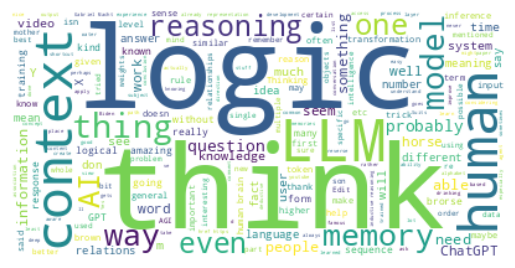

In [25]:
# Positive sentiment most common words

pos_text = " ".join(text for text in pos_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive sentiment with chatGPT come from comments mentioning ```think```, ```logic```, ```LLM```, ```human``` and ```context``` .

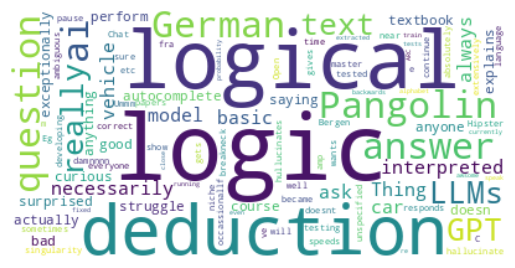

In [26]:
# Neutral sentiment most common words

neu_text = " ".join(text for text in neu_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Neutral sentiment with chatGPT come from comments that have ```deduction```, ```logic```, ```Pangolin``` and ```German``` in it. Interesting that logic is shared between positive and neutral sentiments.

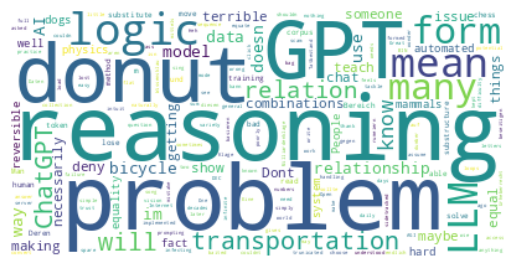

In [27]:
# Negative sentiment most common words

neg_text = " ".join(text for text in neg_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative sentiment with chatGPT come from comments mentioning ```reasoning```, ```problem``` and ```donut```.

## It is clear that a word cloud does not help with linking sentiment here. It is better to do a phrase cloud.

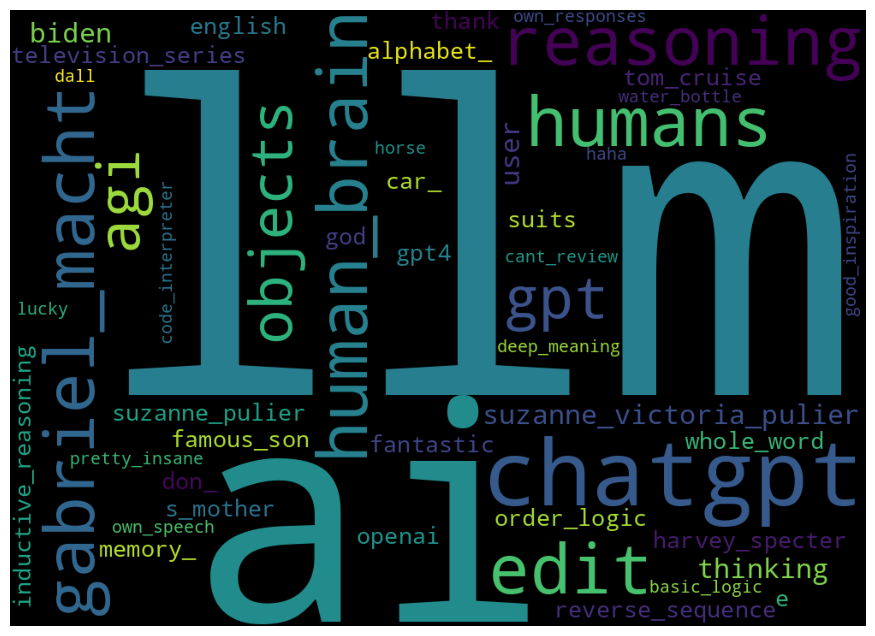

In [28]:
# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(pos_text)
 
# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases= SampleTextInBlobFormat.noun_phrases
 
# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
# print('##### Important word combinations ####')
# print(NewNounString)
 
########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
 
 
from wordcloud import WordCloud, STOPWORDS
 
# Creating a custom list of stopwords
customStopwords = list(STOPWORDS) + ["quot", "_br_", "B", "S", "_t", "a_", "_m", "_s", "s_", "b_", "_"]
 
wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

In [29]:
test2 = pos_df.copy()

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word', stop_words = list(stopwords))
sparse_matrix = word_vectorizer.fit_transform(test2['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_test = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_test['n_grams'] = df_test.index
df_test.reset_index(drop=True, inplace=True)
df_test = df_test[['n_grams', 'frequency']]
df_test.sort_values(by='frequency', ascending=False)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


,n_grams,frequency
4164,think,21
2266,logic,21
3344,reasoning,15
1717,humans,13
756,context,13
...,...,...
1697,huglo norway question,1
1700,human brain know,1
1701,human brain normally,1
1702,human brain separate,1


In [30]:
sample = df_test.sort_values(by='frequency', ascending=False).head(20)
sample

,n_grams,frequency
4164,think,21
2266,logic,21
3344,reasoning,15
1717,humans,13
756,context,13
2501,memory,13
4573,way,12
2834,one,12
3095,probably,11
2243,llms,11


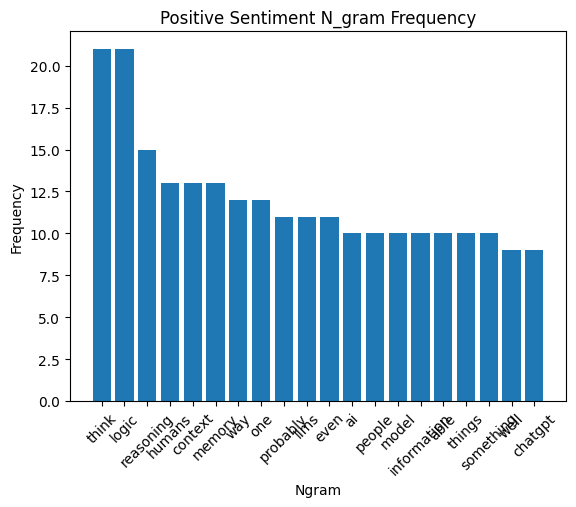

In [31]:
plt.bar(sample['n_grams'], sample['frequency'])
plt.xlabel('Ngram')
plt.ylabel('Frequency')
plt.title('Positive Sentiment N_gram Frequency')
plt.xticks(rotation=45)
plt.show()

In [32]:
# bi- and tri-grams only
# word_vectorizer2 = CountVectorizer(ngram_range=(2,3), analyzer='word', stop_words = list(stopwords))
# sparse_matrix2 = word_vectorizer2.fit_transform(test2['text'])
# frequencies2 = sparse_matrix2.sum(axis=0).T
# df_test2 = pd.DataFrame(frequencies2, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
# df_test2['n_grams'] = df_test2.index
# df_test2.reset_index(drop=True, inplace=True)
# df_test2 = df_test2[['n_grams', 'frequency']]
# df_test2.sort_values(by='frequency', ascending=False)

* After getting some user responses/opinions, this helps us understand the data.

* And when we understand the data, we can better utilize it to measure against our metrics of success for or GenAI chatbot battle.

*Metrics that are different from social media opinion because it is through the lens of developers/business. 

*Scraping social media helps inform product success as well, but measurement is pure sentiment. Analyzing cause for sentiment is key for product feature validation or product feature exploration. And the cause is sought from text/comments. 

*Sentiment analysis supplements new product evaluation by giving users' a 'voice'.

# Metrics of Success (Product (fulfill intended purpose) vs Business (objectives), Leading (engage users effectively)/Lagging, Composite); categories: user, conversational, commercial

1. How precise is the answer/is it relevant?
2. What is the quality of the answer (thoroughness and depth)?

Other:
Ref: https://www.youtube.com/watch?v=xjEu9t1nJag
1. Tokens (prompt size limit)
2. Image Recognition
3. Image Creation
4. Web Access
5. Supported Languages
6. Voice Chat
7. Analyze PDF's
8. Math ability
9. Long Text Summarization
10. Availability

Llama Paper:
1. Commonsense Reasoning
2. World Knowledge
3. Reading Comprehension
4. Math
5. MMLU (5 Shot)?
6. BBH (BigBench Hard)?
7. AGI Eval (3-5 Shot)

Overall Best Metrics from Asking all Metrics Measuring Performance On:

* Perplexity
* BLEU Score (Bilingual Evaluation Understudy Score) - similarity between ref and generated txt
* ROUGE (Recall-Oriented Understudy for Gisting Evaluation) - how accurate are summaries
* Human Evaluation
* Engagement Metrics (conversion rate/win rate, average conversion duration, # msg's exchanged, user satisfaction, volume of active user sessions, bounce rate, satisfaction rate, retention rate)
* Diversity and Novelty
* Context Coherence

* Appropriateness
* Sentiment Accuracy
* Question Answering Accuracy/Task Accuracy Rate/NLP Accuracy/Comprehension Capabilities
* Dialog Breakdown Rate/Error Rate/Fallback Rate
* Human Likeness/Response Generation Fluency
* Task Success Rate/Task Completion Rate/Average Cycle Length/Goal Completion Rate/Self-Service Rate
* Efficiency/Average Resolution Time

* Cost Savings
* Brand Perception
* Sales Revenue
* Personalization
* Adaptability
* Scalability
* Average Contract Value
* Questions Per Conversation/ AI chatbot interaction rate
* Chatbot usage distribution per hour
* Conversation starter messages 

* Total users